# Install libraries and download data


In [3]:
#!pip install yfinance
#!pip install yahoofinancials

import yfinance as yf

#start and end date of the data. Can be changed freely.
startDate = "2006-01-01"
endDate = "2022-12-31"

#Load SPY historical data
SPY = yf.download('SPY', start=startDate, end=endDate)
SPY.to_csv('SPY')
SPY= SPY.sort_values('Date')

#load MSFT historical data
MSFT= yf.download('MSFT', start=startDate, end=endDate)
MSFT.to_csv('MSFT')
MSFT= MSFT.sort_values('Date')

#load AMC historical data
AMC= yf.download('AMC', start=startDate, end=endDate)
AMC.to_csv('AMC')
AMC= AMC.sort_values('Date')


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


# Import and visualise some data
must run

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(suppress=True)

Text(0, 0.5, 'Close Price')

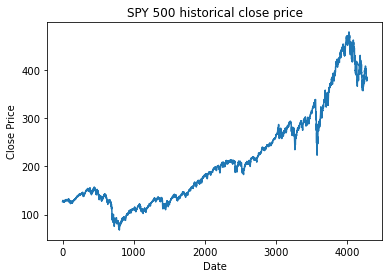

In [5]:
spy = pd.read_csv('SPY')
spy = spy.sort_values('Date')

for i in range(len(spy)-1):
    spy.loc[i,"profit"] = spy.loc[i+1,'Close']- spy.loc[i,'Open']
    
plt.plot(spy['Close'])
# adding title/year the plot
plt.title('SPY 500 historical close price')
plt.xlabel('Date')
plt.ylabel('Close Price')

Text(0, 0.5, 'Close Price')

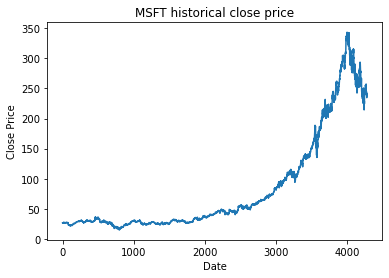

In [6]:
msft = pd.read_csv('MSFT')
msft = msft.sort_values('Date')

for i in range(len(msft)-1):
    msft.loc[i,"profit"] = msft.loc[i+1,'Close']- msft.loc[i,'Open']
    
plt.plot(msft['Close'])
# adding title/year the plot
plt.title('MSFT historical close price')
plt.xlabel('Date')
plt.ylabel('Close Price')

Text(0, 0.5, 'Close Price')

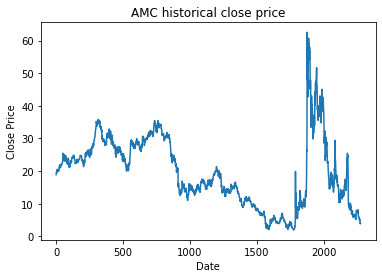

In [7]:
amc = pd.read_csv('AMC')
amc = amc.sort_values('Date')

for i in range(len(amc)-1):
    amc.loc[i,"profit"] = amc.loc[i+1,'Close']- amc.loc[i,'Open']
    
plt.plot(amc['Close'])
# adding title/year the plot
plt.title('AMC historical close price')
plt.xlabel('Date')
plt.ylabel('Close Price')

# Create the class and define the functions

In [25]:
#To implement the Q-learning algorithm, we referred to the solution code provided in the INM707 lab 04 and made modifications to suit our environment.
import matplotlib.pyplot as plt

class Qlearner:
    def __init__(self, initial_R_matrix):
        
        #states and actions
        self.stateslist = ['0','1','2','3', '4', '5', '6', '7']            #S
        self.actionslist = ['hold','buy','sell']       #A
        
        #initial Q and R matrix.
        self.R_matrix = initial_R_matrix               #R
        self.Q_matrix = np.zeros(self.R_matrix.shape)  #Q

        #state transition matrix
        self.state_transition_matrix = np.zeros((len(self.stateslist), len(self.stateslist)))
        
        self.cummulative_reward_over_time_list = []
        
        return
        

        
#↑class and parameters
#--------------------------------------------------------------------------------------
#↓functions
       
        
        
    def train(self, trainingdata, epoches =100, alpha =0.5, gamma =0.5, epsilon_decay=0.999, epsilon = 0.9, initialbudget = 2000):
        

        for epoch in range(epoches):
            
            #Must start and end on a random date, otherwise the agent does not learn
            initial_date = np.random.randint(0,500)  
            end_date = np.random.randint(len(trainingdata)-500, len(trainingdata))
            
            currentdate=initial_date
            
            current_budget = initialbudget
            initial_stock_holds = np.random.randint(0,2)
            current_stock_holds = initial_stock_holds
            current_price = trainingdata.loc[initial_date, "Close"]   


            #initialize intial state
            if (trainingdata.loc[initial_date, "profit"]>=0) & (current_stock_holds> 0) & (current_budget >0):  
                s=0
            elif (trainingdata.loc[initial_date, "profit"]>=0) & (current_stock_holds<= 0) & (current_budget >0):   
                s=1
            elif (trainingdata.loc[initial_date, "profit"]<0) & (current_stock_holds > 0) & (current_budget >0):   
                s=2
            elif (trainingdata.loc[initial_date, "profit"]<0) & (current_stock_holds <=0) & (current_budget >0):   
                s=3
            elif (trainingdata.loc[initial_date, "profit"]>=0) & (current_stock_holds> 0) & (current_budget <=0):        
                s=4
            elif (trainingdata.loc[initial_date, "profit"]>=0) & (current_stock_holds<= 0) & (current_budget <=0):   
                s=5
            elif (trainingdata.loc[initial_date, "profit"]<0) & (current_stock_holds > 0) & (current_budget <=0): 
                s=6
            elif (trainingdata.loc[initial_date, "profit"]<0) & (current_stock_holds <=0) & (current_budget <=0):  
                s=7
                          
            #print("Starting state is '{}'".format(self.stateslist[s]))
            

            #limit the days of training
            while currentdate < end_date -1: 
            
                #Find actions. np.nan in the R matrix are forbidden actions.
                available_actions = np.where(~np.isnan(self.R_matrix[s]))[0]   #all available actions. random       
                
                
                q_values = [self.Q_matrix[s,a] for a in available_actions]
                best_actions = available_actions[np.where(q_values == np.max(q_values))[0]] #actions with highest Q value. greedy
                best_actions_q_values = [self.Q_matrix[s,x] for x in best_actions]

                # Epsilon-greedy in each episode
                if np.random.uniform() > epsilon:
                    a = np.random.choice(available_actions)
                else:
                    a = np.random.choice(best_actions)
                #Here a is the final action taken from the 'available actions'and 'best actions'
                
                #print('date:', currentdate, 'current_stock_holds:', current_stock_holds)
                #print('current_state:', s, 'available_actions:', available_actions)
                #print('best_actions:', best_actions, 'action_taken:', a)
                
                #results of the action
                if a == np.array(0):     #hold
                    current_stock_holds=current_stock_holds
                    current_budget = current_budget
               
                elif a ==np.array(1):      #buy
                    current_stock_holds +=1
                    current_budget -= trainingdata.loc[currentdate, "Close"]   
                    
                elif a ==np.array(2):       #sell
                    current_stock_holds -=1
                    current_budget += trainingdata.loc[currentdate, "Close"]   

                #print('budget:', budget, 'a:', a)

                    
                #update r
                r = self.R_matrix[s,a]
                #update s
                s_old = s
                #update date
                currentdate += 1
            
                
                #Descritize the new state (next day state) into one of 8 types.            
                if (trainingdata.loc[currentdate, "profit"]>=0) & (current_stock_holds> 0) & (current_budget >0):  
                    s_new=0
                elif (trainingdata.loc[currentdate, "profit"]>=0) & (current_stock_holds<= 0) & (current_budget >0): 
                    s_new=1
                elif (trainingdata.loc[currentdate, "profit"]<0) & (current_stock_holds > 0) & (current_budget >0):  
                    s_new=2
                elif (trainingdata.loc[currentdate, "profit"]<0) & (current_stock_holds <=0) & (current_budget >0):  
                    s_new=3
                elif (trainingdata.loc[currentdate, "profit"]>=0) & (current_stock_holds> 0) & (current_budget <=0): 
                    s_new=4
                elif (trainingdata.loc[currentdate, "profit"]>=0) & (current_stock_holds<= 0) & (current_budget <=0): 
                    s_new=5
                elif (trainingdata.loc[currentdate, "profit"]<0) & (current_stock_holds > 0) & (current_budget <=0):  
                    s_new=6
                elif (trainingdata.loc[currentdate, "profit"]<0) & (current_stock_holds <=0) & (current_budget <=0): 
                    s_new=7    
                
                '''
                #if budget <= 0:
                    #print('budget <=0')
                    #break
                '''

                #Update the Q matrix
                self.Q_matrix[s_old,a] = self.Q_matrix[s_old,a] + alpha * ( r + gamma * np.max(self.Q_matrix[s_new,:]) - self.Q_matrix[s_old,a])
        
                #count the update state transition
                self.state_transition_matrix[s_old, s_new] +=1
                
                #Update s
                s = s_new
            
            #print('current date:', currentdate, 'current stock hold:', current_stock_holds, 'budget:', budget)
            #print('Epoch {} finished. Q matrix values:\n{}'.format(epoch, self.Q_matrix.round(3)))
            
            self.cummulative_reward_over_time_list.append(np.sum(self.Q_matrix))

        return
    
    
    def plot_cummulative_reward_over_time(self, figure_name):
        plt.title(figure_name)
        plt.plot(figsize=(16,9))
        plt.plot(self.cummulative_reward_over_time_list)
        plt.xlabel('episode')
        plt.ylabel('Cummulative reward over time')    

# Create an object and test on SPY
Here we use the spy stock ,and superparameters are default.

R matrix:
 [[  10.    0.  100.]
 [   0.    0.   nan]
 [ -11.    0. -110.]
 [   0.    0.   nan]
 [  10.   nan  100.]
 [   0.   nan   nan]
 [ -11.   nan -110.]
 [   0.   nan   nan]]
final Q matrix:
 [[ 65.6546633   55.20431622 145.2761118 ]
 [ 25.26742417  54.92660407   0.        ]
 [ 30.80829184  42.4702908  -72.47490207]
 [ 23.73399194  43.77093673   0.        ]
 [ 65.77968618   0.         147.65765679]
 [  0.           0.           0.        ]
 [ 31.40182004   0.         -69.30062445]
 [  0.           0.           0.        ]]
state transition matrix:
 [[219479.  70011. 112929.  36909.   5136.      0.   2733.      0.]
 [ 46980.   9673.  25593.   5343.   7941.      0.   4342.      0.]
 [124451.   3944. 182148.   5284.  20903.      0.  29180.      0.]
 [ 18547.   3669.  25087.   5015.   2695.      0.   3896.      0.]
 [ 33414.  11433.  15079.   4964.   8457.     10.   3853.      4.]
 [     0.      0.      0.      0.      0.    426.      0.    271.]
 [  4270.   1131.   5018.   1365.  321

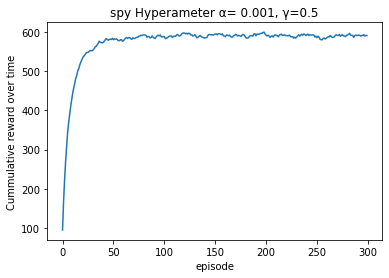

In [33]:
R = np.empty((8,3))
R[0,0]=10      
R[1,0]=0
R[2,0]=-11  
R[3,0]=0
R[4,0]=10      
R[5,0]=0
R[6,0]=-11  
R[7,0]=0
#cannot buy at state 4,5,6,7 because budget<=0
R[0,1]=0
R[1,1]=0
R[2,1]=0
R[3,1]=0
R[4,1]=np.nan
R[5,1]=np.nan
R[6,1]=np.nan
R[7,1]=np.nan
#cannot sell at stae 1,3,5,7 becasue stock hold <=0
R[0,2]=100  
R[1,2]=np.nan
R[2,2]=-110  
R[3,2]=np.nan
R[4,2]=100  
R[5,2]=np.nan
R[6,2]=-110  
R[7,2]=np.nan
print('R matrix:\n', R)

qlearner1 = Qlearner(initial_R_matrix = R)

#train
qlearner1.train(trainingdata = spy, epoches=300, alpha =0.001, gamma =0.5, epsilon_decay=0.999, epsilon = 0.7, initialbudget=2000)

#print result
qlearner1.plot_cummulative_reward_over_time(figure_name = 'spy Hyperameter α= 0.001, γ=0.5')
print('final Q matrix:\n', qlearner1.Q_matrix)
print('state transition matrix:\n', qlearner1.state_transition_matrix)

Try a bigger learning rate, we can find the curve is shocking. It hardly converges.

R matrix:
 [[  10.    0.  100.]
 [   0.    0.   nan]
 [ -11.    0. -110.]
 [   0.    0.   nan]
 [  10.   nan  100.]
 [   0.   nan   nan]
 [ -11.   nan -110.]
 [   0.   nan   nan]]
final Q matrix:
 [[ 66.26482743  53.47791132 124.05609493]
 [ 23.57718868  45.88775795   0.        ]
 [ 31.35542767  38.33280096 -72.6091863 ]
 [ 22.34087415  42.17061665   0.        ]
 [ 60.5243023    0.         123.69186836]
 [  0.           0.           0.        ]
 [ 28.48450731   0.         -74.58753059]
 [  0.           0.           0.        ]]
state transition matrix:
 [[167832.  78445.  86610.  41057.   1715.      0.    902.      0.]
 [ 50643.   3515.  28263.   2060.  16635.      0.   9402.      0.]
 [ 98813.   1137. 150842.   1707.  22829.      0.  35261.      0.]
 [ 17419.   1232.  26078.   1725.   6809.      0.   7341.      0.]
 [ 40028.  25311.  16860.  13203.   4008.    161.   1920.     57.]
 [     0.      0.      0.      0.      0.  25646.      0.  12269.]
 [  1744.    810.   1867.    792.  495

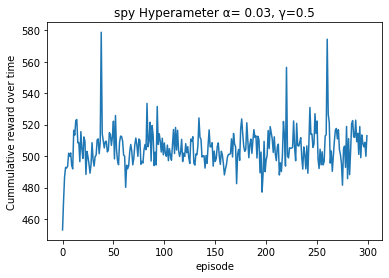

In [34]:
R = np.empty((8,3))
R[0,0]=10      
R[1,0]=0
R[2,0]=-11  
R[3,0]=0
R[4,0]=10      
R[5,0]=0
R[6,0]=-11  
R[7,0]=0
#cannot buy at state 4,5,6,7 because budget<=0
R[0,1]=0
R[1,1]=0
R[2,1]=0
R[3,1]=0
R[4,1]=np.nan
R[5,1]=np.nan
R[6,1]=np.nan
R[7,1]=np.nan
#cannot sell at stae 1,3,5,7 becasue stock hold <=0
R[0,2]=100  
R[1,2]=np.nan
R[2,2]=-110  
R[3,2]=np.nan
R[4,2]=100  
R[5,2]=np.nan
R[6,2]=-110  
R[7,2]=np.nan
print('R matrix:\n', R)


qlearner2 = Qlearner(initial_R_matrix = R)

#train
qlearner2.train(trainingdata = spy, epoches=300, alpha =0.03, gamma =0.5, epsilon_decay=0.999, epsilon = 0.9, initialbudget=2000)

#print result
qlearner2.plot_cummulative_reward_over_time(figure_name = 'spy Hyperameter α= 0.03, γ=0.5')
print('final Q matrix:\n', qlearner2.Q_matrix)
print('state transition matrix:\n', qlearner2.state_transition_matrix)

Test a very big budget.
We can see that the curve is smooth, but state 4-7 will not happen (the agent has too much money), and so it is with the corresponding transitions.

R matrix:
 [[  10.    0.  100.]
 [   0.    0.   nan]
 [ -11.    0. -110.]
 [   0.    0.   nan]
 [  10.   nan  100.]
 [   0.   nan   nan]
 [ -11.   nan -110.]
 [   0.   nan   nan]]
final Q matrix:
 [[ 68.53154498  58.42495754 153.3502496 ]
 [ 24.69183144  56.90462144   0.        ]
 [ 34.21679641  46.26063337 -66.83269055]
 [ 19.29794873  43.81093066   0.        ]
 [  0.           0.           0.        ]
 [  0.           0.           0.        ]
 [  0.           0.           0.        ]
 [  0.           0.           0.        ]]
state transition matrix:
 [[322712.  54013. 162745.  28850.      0.      0.      0.      0.]
 [ 34851.   1835.  19683.   1067.      0.      0.      0.      0.]
 [198861.    882. 273855.   1192.      0.      0.      0.      0.]
 [ 11962.    648.  18552.    901.      0.      0.      0.      0.]
 [     0.      0.      0.      0.      0.      0.      0.      0.]
 [     0.      0.      0.      0.      0.      0.      0.      0.]
 [     0.      0.      0.      0.     

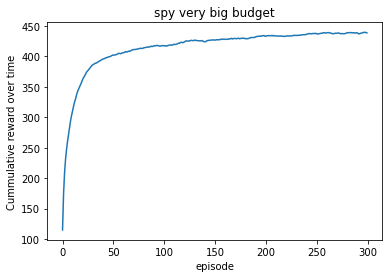

In [35]:
R = np.empty((8,3))
R[0,0]=10      
R[1,0]=0
R[2,0]=-11  
R[3,0]=0
R[4,0]=10      
R[5,0]=0
R[6,0]=-11  
R[7,0]=0
#cannot buy at state 4,5,6,7 because budget<=0
R[0,1]=0
R[1,1]=0
R[2,1]=0
R[3,1]=0
R[4,1]=np.nan
R[5,1]=np.nan
R[6,1]=np.nan
R[7,1]=np.nan
#cannot sell at stae 1,3,5,7 becasue stock hold <=0
R[0,2]=100  
R[1,2]=np.nan
R[2,2]=-110  
R[3,2]=np.nan
R[4,2]=100  
R[5,2]=np.nan
R[6,2]=-110  
R[7,2]=np.nan
print('R matrix:\n', R)


qlearner3 = Qlearner(initial_R_matrix = R)

#train
qlearner3.train(trainingdata = spy, epoches=300, alpha =0.001, gamma =0.5, epsilon_decay=0.999, epsilon = 0.9, initialbudget=9999999)

#print result
qlearner3.plot_cummulative_reward_over_time(figure_name = 'spy very big budget')
print('final Q matrix:\n', qlearner3.Q_matrix)
print('state transition matrix:\n', qlearner3.state_transition_matrix)

Test another initial R matrix.
We can see that if we proportionally change the R matrix here, from the curve and transition matrix we find that the learning process is not influenced. The final R matrix and reward will also change proportionally though.

R matrix:
 [[  1000.      0.  10000.]
 [     0.      0.     nan]
 [ -1100.      0. -11000.]
 [     0.      0.     nan]
 [  1000.     nan  10000.]
 [     0.     nan     nan]
 [ -1100.     nan -11000.]
 [     0.     nan     nan]]
final Q matrix:
 [[ 6461.40141773  5530.62523716 14477.95464681]
 [ 2508.83197724  5457.40593071     0.        ]
 [ 3140.77824772  4146.15234274 -7260.4499209 ]
 [ 2386.17659671  4359.84234642     0.        ]
 [ 6624.04633882     0.         14459.16197348]
 [    0.             0.             0.        ]
 [ 3074.10938125     0.         -6942.68994829]
 [    0.             0.             0.        ]]
state transition matrix:
 [[224280.  69371. 115121.  36321.   5180.      0.   2655.      0.]
 [ 46312.   9482.  25673.   5302.   7911.      0.   4474.      0.]
 [126848.   3833. 185399.   5204.  20820.      0.  28964.      0.]
 [ 18098.   3697.  24685.   5040.   2684.      0.   3839.      0.]
 [ 32848.  11533.  15122.   4847.   8292.     14.   3743.      3.]
 [     0.

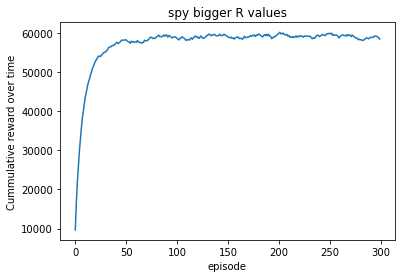

In [36]:
R2 = np.empty((8,3))
R2[0,0]=1000      
R2[1,0]=0
R2[2,0]=-1100  
R2[3,0]=0
R2[4,0]=1000      
R2[5,0]=0
R2[6,0]=-1100  
R2[7,0]=0
#cannot buy at state 4,5,6,7 because budget<=0
R2[0,1]=0
R2[1,1]=0
R2[2,1]=0
R2[3,1]=0
R2[4,1]=np.nan
R2[5,1]=np.nan
R2[6,1]=np.nan
R2[7,1]=np.nan
#cannot sell at stae 1,3,5,7 becasue stock hold <=0
R2[0,2]=10000  
R2[1,2]=np.nan
R2[2,2]=-11000  
R2[3,2]=np.nan
R2[4,2]=10000
R2[5,2]=np.nan
R2[6,2]=-11000
R2[7,2]=np.nan
print('R matrix:\n', R2)

qlearner4 = Qlearner(initial_R_matrix = R2)

#train
qlearner4.train(trainingdata = spy, epoches=300, alpha =0.001, gamma =0.5, epsilon_decay=0.999, epsilon = 0.7, initialbudget=2000)

#print result
qlearner4.plot_cummulative_reward_over_time(figure_name = 'spy bigger R values')
print('final Q matrix:\n', qlearner4.Q_matrix)
print('state transition matrix:\n', qlearner4.state_transition_matrix)